
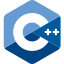
<br>

<div style="text-align:center; font-size:200%;">
  <b>GoF: Template Method Pattern</b>
</div>
<br/>
<div style="text-align:center; font-size:120%;">Dr. Matthias Hölzl</div>
<br/>
<div style="text-align:center;">Coding-Academy Munich</div>
<br/>
<!-- 04 GoF Template Method Pattern.ipynb -->
<!-- slides/module_450_design_patterns/topic_210_template_method.cpp -->


## Template Method (Behavioral Pattern)

### Intent

Define a behavior or an algorithm, in which subclasses can implement or
modify certain steps. The subclasses can override individual steps of the
algorithm, but have no influence on its overall structure.


## Template Method (Behavioral Pattern)

### Motivation

- An application that has to deal with different types of documents.
- In some operations of the application there are similarities, but also
  differences between the different documents
- E.g. the process of saving a document is always the same, but the way the
  individual document types are saved is different
- The application defines concrete operations that call abstract operations
  that are part of their execution


## Class Diagram

<img src="img/template_method_example.svg"
     style="display:block;margin:auto;width:40%"/>

In [ ]:
#include <iostream>
#include <string>

In [ ]:
class Document {
public:
  virtual ~Document() = default;

  void Save() const {
    std::cout << "Saving to existing file.\n";
    DoSave();
    std::cout << "Document saved.\n\n";
  }

  void SaveAs() const {
    std::cout << "Asking user for file name.\n";
    DoSave();
    std::cout << "Document saved.\n\n";
  }

protected:
    virtual void DoSave() const = 0;
};

In [ ]:
class TextDocument : public Document {
  void DoSave() const override {
    std::cout << "-> Saving text document in DOCX format.\n";
  }
};

In [ ]:
class SpreadsheetDocument : public Document {
  void DoSave() const override {
    std::cout << "-> Saving spreadsheet in XLSX format.\n";
  }
};

In [ ]:
SpreadsheetDocument spreadsheet;
spreadsheet.Save();
spreadsheet.SaveAs();

In [ ]:
TextDocument text;
text.Save();
text.SaveAs();

In [ ]:
const Document* doc = &spreadsheet;
doc->Save();

In [ ]:
doc = &text;
doc->SaveAs();


## Template Method (Behavioral Pattern)

### Applicability

- Implement the invariant parts of an algorithm once and realize behavioral
  variations in subclasses
- Centralize common behavior in a class to avoid code duplication
- Control the extension of behavior by subclasses


## Template Method (Behavioral Pattern)

### Structure

<img src="img/pat_template_method.svg"
     style="display:block;margin:auto;width:40%"/>


## Template Method (Behavioral Pattern)

### Participants

- `AbstractClass`:
  - defines abstract *primitive operations* that concrete subclasses
    implement (hooks)
  - implements a template method defining the skeleton of an
    algorithm
- `ConcreteClass`:
  - implements the primitive operations

## Template Method (Behavioral Pattern)

### Collaborations

`ConcreteClass` relies on `AbstractClass` to implement the invariant steps
of the algorithm


## Template Method (Behavioral Pattern)

### Consequences

- Template methods are a fundamental strategy for code reuse
- They lead to an inverted control flow, which is often referred to as the
  "Hollywood Principle" ("Don't call us, we'll call you")
- It is essential for template methods to clearly define which methods must
  be overridden and which are optional


## Workshop: Fashion Design

### Crafting Stylish Wear Using the Template Method

The world of fashion is vast, with countless styles, materials, and design
patterns. However, when it comes to the actual creation process of different
clothing items, there are certain steps that remain fairly consistent. For
instance, the process could involve:
- develop a design pattern for the clothing item
- choose the right material
- cut the material according to the pattern
- sew the pieces together
- add finishing details


Your task as a budding fashion designer (and programmer!) is to create a
systematic approach to design different types of clothing. But, not just any
approach, we need an efficient and extendable one. Let's assume you want to
create both dresses and suits. While the overall process is similar, the
details vary significantly. For example, when adding finishing details,
dresses might require lace details, while suits need button placements.

The goal is to develop a system where the generic steps are defined once, but
the specific steps can be tailored according to the clothing item.

1. Define a generic process of creating clothing based on the steps outlined
   above.
2. Identify steps that are common across all clothing items.
3. Identify steps that are unique and specific to each clothing type.
4. Implement this process using the Template Method design pattern in C++.
5. Implement concrete classes to create suits and dresses.